In [134]:
# import thư viện
import pandas as pd
import numpy as np
import seaborn as sns

import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

In [135]:
# Đọc dữ liệu
df = pd.read_csv('house_price_Dong_Da_Ha-Noi_subdata.csv')

# 5 dòng đầu
df.head()

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,NaN,NaN,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,NaN,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo
3,26.0,2900.0,44292,So do,NaN,NaN,4.0,3.0,4.0,21.014325,105.834918,trong ngo
4,40.0,3950.0,44292,So do,NaN,NaN,NaN,NaN,5.0,21.009862,105.838083,trong ngo


In [136]:
# 5 dòng cuối
df.tail()

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
666,168.0,23500.0,44325,NaN,NaN,NaN,3.0,3.0,3.0,21.000823,105.829097,mat pho
667,65.0,17500.0,44325,So do,NaN,NaN,NaN,6.0,5.0,21.011495,105.816666,mat pho
668,60.0,17500.0,44197,NaN,NaN,NaN,NaN,NaN,NaN,21.011495,105.816666,mat pho
669,45.0,24800.0,44197,NaN,NaN,NaN,NaN,NaN,NaN,21.016106,105.832157,mat pho
670,107.0,45000.0,44325,So do,NaN,NaN,NaN,NaN,5.0,21.009123,105.824428,mat pho


In [137]:
# 5 dòng ngẫu nhiên
df.sample(5)

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
517,73.0,13700.0,44306,So do,dong,dong,5.0,6.0,5.0,21.027478,105.834293,mat pho
293,30.0,3300.0,44197,So do,Nam,Nam,NaN,NaN,NaN,21.022491,105.837103,trong ngo
337,45.0,5750.0,44312,So do,NaN,NaN,4.0,3.0,5.0,21.009239,105.824230,trong ngo
235,62.0,5390.0,44306,So do,NaN,NaN,3.0,4.0,4.0,21.029522,105.827353,trong ngo
287,35.0,6900.0,44312,So do,NaN,NaN,NaN,3.0,5.0,20.998499,105.837690,trong ngo


In [138]:
# mô tả dataframe
df.describe()

,area,price,postDate,toilet,bedroom,floor,lat,long
count,665.000000,6.170000e+02,671.000000,240.000000,320.00000,366.000000,671.000000,671.000000
mean,103.763534,2.892758e+04,44259.903130,3.645833,4.31875,4.762295,21.015733,105.825550
std,471.861867,1.464474e+05,58.280392,2.349126,2.58976,1.676853,0.006517,0.009011
min,0.000000,4.500000e+00,44197.000000,1.000000,1.00000,1.000000,20.998499,105.795544
25%,39.000000,3.950000e+03,44197.000000,2.000000,3.00000,4.000000,21.011094,105.822605
50%,55.000000,8.900000e+03,44292.000000,4.000000,4.00000,5.000000,21.018072,105.828985
75%,80.000000,2.150000e+04,44312.000000,4.250000,6.00000,5.000000,21.018777,105.829949
max,11000.000000,3.300000e+06,44325.000000,16.000000,22.00000,11.000000,21.036845,105.841407


In [10]:
# thông tin về dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area               665 non-null    float64
 1   price              617 non-null    float64
 2   postDate           671 non-null    int64  
 3   land_certificate   369 non-null    object 
 4   house_direction    42 non-null     object 
 5   balcony_direction  24 non-null     object 
 6   toilet             240 non-null    float64
 7   bedroom            320 non-null    float64
 8   floor              366 non-null    float64
 9   lat                671 non-null    float64
 10  long               671 non-null    float64
 11  property_type      671 non-null    object 
dtypes: float64(7), int64(1), object(4)
memory usage: 63.0+ KB


Có nhiều cột có giá trị khuyết thiếu

In [11]:
# Sử dụng isNa để tìm dữ liệu khuyết thiếu
df.isna()

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,False,False,False,False,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,True,True,False,False,False,False,False,False
4,False,False,False,False,True,True,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
666,False,False,False,True,True,True,False,False,False,False,False,False
667,False,False,False,False,True,True,True,False,False,False,False,False
668,False,False,False,True,True,True,True,True,True,False,False,False
669,False,False,False,True,True,True,True,True,True,False,False,False


In [13]:
# Xóa bỏ hết tất cả những dòng dữ liệu không có thông tin về giá
df = df.dropna(subset = 'price')

df.head()

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,NaN,NaN,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,NaN,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo
3,26.0,2900.0,44292,So do,NaN,NaN,4.0,3.0,4.0,21.014325,105.834918,trong ngo
4,40.0,3950.0,44292,So do,NaN,NaN,NaN,NaN,5.0,21.009862,105.838083,trong ngo


In [48]:
# Thay thế giá trị khuyết thiếu của land_certificate bằng =”không có thông tin”
df['land_certificate'].fillna('không có thông tin',inplace = True) # inplace = True --> sửa ngay trên dataframe gốc

In [41]:
# Thay thế giá trị khuyết thiếu của house_direction, balcony_direction, toilet, bedroom, Floor
# bằng giá trị có tần số xuất hiện lớn nhất của các thuộc tính đó

df['house_direction'].fillna(df['house_direction'].mode().iloc[0],inplace = True) #iloc[0] để tránh việc mode là NA

In [43]:
df['balcony_direction'].fillna(df['balcony_direction'].mode().iloc[0],inplace = True)

In [44]:
df['toilet'].fillna(df['toilet'].mode().iloc[0],inplace = True)

In [51]:
df['bedroom'].fillna(df['bedroom'].mode().iloc[0],inplace = True)

In [47]:
df['floor'].fillna(df['floor'].mode().iloc[0],inplace = True)

In [90]:
# Tính toán giá/m2  ( đơn vị triệu/m2)
df['trieu_tren_m2'] = df['price'] / df['area']

In [91]:
# Lọc thông tin những bất động sản ở trong ngõ thành bộ dữ liệu nhà ngõ
df_ngo = df[df['property_type']== 'trong ngo']

In [92]:
df_ngo

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type,trieu_tren_m2
0,50.0,14700.0,44197,So do,dong-Nam,dong-Nam,4.0,6.0,6.0,21.015698,105.824583,trong ngo,294.000000
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo,73.684211
2,62.0,11000.0,44268,So do,dong-Nam,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo,177.419355
3,26.0,2900.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,4.0,21.014325,105.834918,trong ngo,111.538462
4,40.0,3950.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,5.0,21.009862,105.838083,trong ngo,98.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,90.0,32000.0,44325,không có thông tin,dong-Bac,Tay-Bac,4.0,3.0,8.0,21.017799,105.810572,trong ngo,355.555556
445,58.0,15800.0,44325,So do,dong-Nam,dong-Nam,4.0,5.0,7.0,21.020556,105.828657,trong ngo,272.413793
446,96.0,10200.0,44325,So do,dong-Nam,dong-Nam,4.0,3.0,4.0,21.012310,105.828978,trong ngo,106.250000
447,38.0,3900.0,44325,So do,dong-Nam,dong-Nam,4.0,3.0,5.0,21.006694,105.835635,trong ngo,102.631579


In [102]:
# Phát hiện giá trị ngoại lai của các thuộc tính: diện tích, giá/m2 bằng phương pháp IQR
# tính giá trị Q1 và Q3
Q1_area = df['area'].quantile(0.25)
Q3_area = df['area'].quantile(0.75)

# tính IQR 
IQR_area = Q3_area-Q1_area

upper_area = Q3_area + 1.5 * IQR_area
lower_area = Q1_area - 1.5 * IQR_area

In [112]:
# tương tự với giá/m2
# tính giá trị Q1 và Q3
Q1_ppm = df['trieu_tren_m2'].quantile(0.25)
Q3_ppm = df['trieu_tren_m2'].quantile(0.75)

# tính IQR 
IQR_ppm = Q3_ppm-Q1_ppm

upper_ppm = Q3_ppm + 1.5 * IQR_ppm
lower_ppm = Q1_ppm - 1.5 * IQR_ppm


In [114]:
# Thực hiện loại bỏ các dòng dữ liệu ngoại lai của thuộc tính: diện tích
df = df[~((df['area'] < lower_area) | (df['area'] > upper_area))]

In [113]:
# Thực hiện loại bỏ các dòng dữ liệu ngoại lai của thuộc tính: giá/m2
df = df[~((df['trieu_tren_m2'] < lower_ppm) | (df['trieu_tren_m2'] > upper_ppm))]

<Axes: xlabel='trieu_tren_m2', ylabel='Density'>

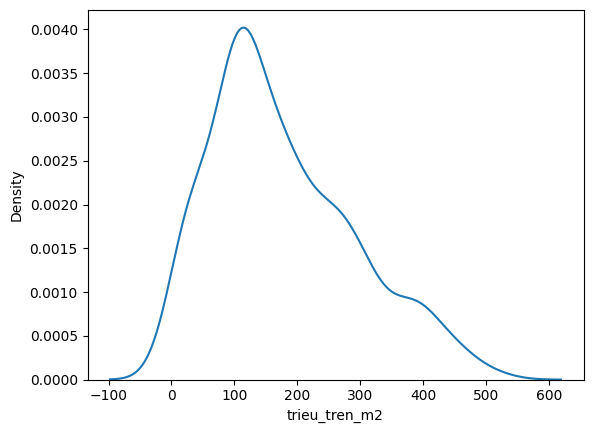

In [117]:
# phân bố dữ liệu trên cột giá/m2
sns.kdeplot(data = df['trieu_tren_m2'])

<Axes: ylabel='trieu_tren_m2'>

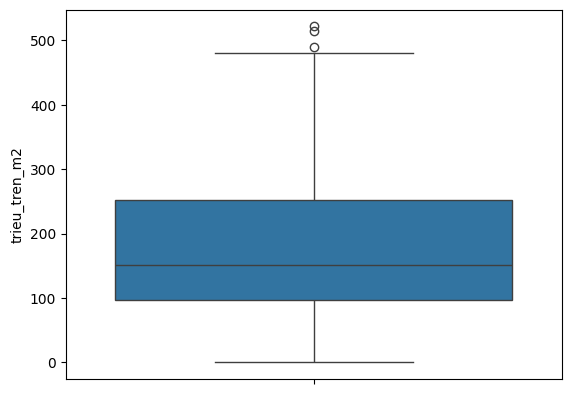

In [133]:
sns.boxplot(df['trieu_tren_m2'])

In [126]:
# Chuẩn hoá với z score
z_scaler = StandardScaler()

df_z = z_scaler.fit_transform(pd.DataFrame(df['trieu_tren_m2']))

<Axes: >

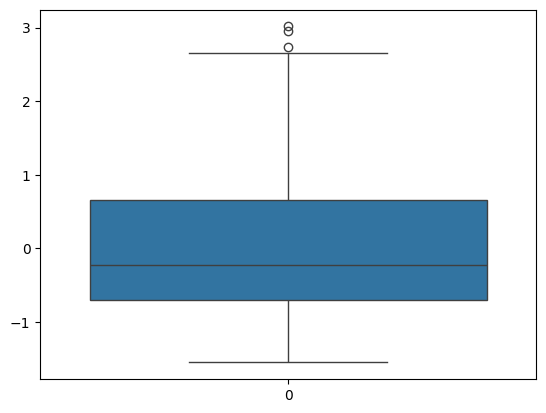

In [127]:
sns.boxplot(df_z)

In [128]:
# Chuẩn hoá với min max
m_scaler = MinMaxScaler()

mms = m_scaler.fit_transform(pd.DataFrame(df['trieu_tren_m2']))

<Axes: >

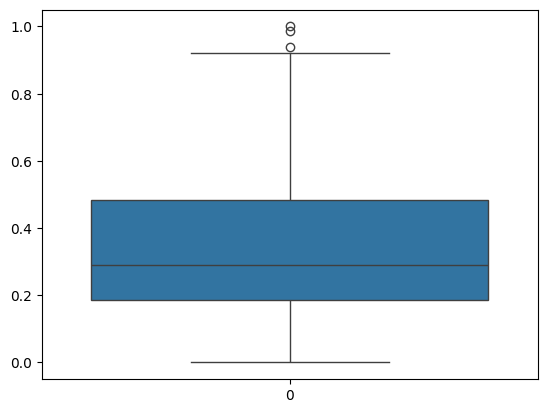

In [129]:
sns.boxplot(mms)

In [130]:
# Chuẩn hoá với robust
r_scaler = RobustScaler()

df_r = r_scaler.fit_transform(pd.DataFrame(df['trieu_tren_m2']))

<Axes: >

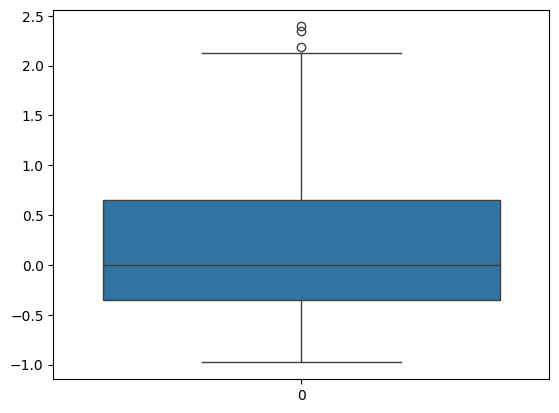

In [131]:
sns.boxplot(df_r)

In [ ]:
# Nhận xét: phân bố của thuộc tính này trước và sau khi chuẩn hóa không có nhiều thay đổi